In [ ]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [140]:
#Call API to get list of current members of congress and select data points

base_url = 'https://api.propublica.org/congress/v1/115/house/members.json'

headers = {
    'X-API-Key': 'yUeLYE1Uopxzi0lWoZngGwGTinRElfb4hLcnw985',
}

response = requests.get(base_url, headers=headers)
data = response.json()
members = data['results'][0]['members']
reps_master_list = pd.DataFrame(members)
col = ['id','first_name', 'last_name', 'party','district', 'state', 
       'total_votes', 'missed_votes', 'seniority', 'missed_votes_pct', 'votes_with_party_pct']
reps_short_list = reps_master_list[col]
reps_short_list['State_Disct'] = reps_short_list['state'] + "-" + reps_short_list['district']
reps_short_list.head()

/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,missed_votes_pct,votes_with_party_pct,State_Disct
0,A000374,Ralph,Abraham,R,5,LA,1147.0,8.0,4,0.70,96.93,LA-5
1,A000370,Alma,Adams,D,12,NC,1147.0,32.0,6,2.79,95.70,NC-12
2,A000055,Robert,Aderholt,R,4,AL,1147.0,48.0,22,4.18,96.82,AL-4
3,A000371,Pete,Aguilar,D,31,CA,1147.0,14.0,4,1.22,92.06,CA-31
4,A000372,Rick,Allen,R,12,GA,1147.0,12.0,4,1.05,97.80,GA-12


In [153]:
#Call API to get list of current members of senate and select data points

base_url = 'https://api.propublica.org/congress/v1/115/senate/members.json'

headers = {
    'X-API-Key': 'yUeLYE1Uopxzi0lWoZngGwGTinRElfb4hLcnw985',
}

response = requests.get(base_url, headers=headers)
data = response.json()

members = data['results'][0]['members']
senate_master_list = pd.DataFrame(members)
col = ['id','first_name', 'last_name', 'party', 'state', 
       'total_votes', 'missed_votes', 'missed_votes_pct', 'votes_with_party_pct']
senate_short_list = senate_master_list[col]
senate_short_list['State_Disct'] = senate_short_list['state'] + "- None" 
senate_short_list.head()

/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,first_name,last_name,party,state,total_votes,missed_votes,missed_votes_pct,votes_with_party_pct,State_Disct
0,A000360,Lamar,Alexander,R,TN,591,26,4.40,96.81,TN- None
1,B001230,Tammy,Baldwin,D,WI,591,3,0.51,94.39,WI- None
2,B001261,John,Barrasso,R,WY,591,1,0.17,96.61,WY- None
3,B001267,Michael,Bennet,D,CO,591,5,0.85,90.61,CO- None
4,B001277,Richard,Blumenthal,D,CT,591,3,0.51,90.82,CT- None


0:00:00.000054


295    M001151
296    N000002
297    N000179
298    N000015
299    N000189
300    N000184
301    N000127
302    N000188
303    N000190
304    N000147
305    N000181
306    O000171
307    O000170
308    O000168
309    P000601
310    P000034
311    P000609
312    P000613
313    P000096
314    P000594
315    P000604
316    P000588
317    P000197
318    P000593
319    P000605
320    P000608
321    P000258
322    P000597
323    P000606
324    P000610
        ...   
426    V000108
427    W000812
428    W000798
429    W000791
430    W000819
431    W000813
432    W000820
433    W000799
434    W000797
435    W000187
436    W000822
437    W000814
438    W000806
439    W000800
440    W000815
441    W000821
442    W000826
443    W000816
444    W000795
445    W000808
446    W000804
447    W000809
448    W000810
449    Y000062
450    Y000063
451    Y000065
452    Y000066
453    Y000033
454    Z000017
455    Z000018
Name: id, Length: 161, dtype: object


In [6]:
#Create Empty Data Frame
col = ['member_id', 'description', 'position', 'question', 'result','date', 'congress']
masterdata = pd.DataFrame(columns = col)

#Get list of members from first API Call
memberslist = reps_short_list['id']

#Start Timer
start = datetime.now()

#For loop to loop through members
for i, memid in enumerate(memberslist,1):

    #set offset, and congress session... most current congress is 115th
    offset = 0
    rows = 1
    num_results = 1
    congress = '115'
    headers = {'X-API-Key': 'yUeLYE1Uopxzi0lWoZngGwGTinRElfb4hLcnw985',}
    try:
        while congress == '115':
            #base_url = 'https://api.propublica.org/congress/v1/members/B001261/votes.json' 
            base_url = 'https://api.propublica.org/congress/v1/members/' + memid + '/votes.json'
            params = {'offset' : offset}
            response = requests.get(base_url, headers=headers, params=params)
            data = response.json()
            votes = data['results'][0]['votes']
            votes_df = pd.DataFrame(votes)
            data = votes_df[col]
            num_results = len(data)
            masterdata = masterdata.append(data)
            rows = len(masterdata)
            data['congress'].astype(str).astype(int)
            congress = data.iloc[0,-1]
            offset = offset + 20
        print(f"Printing {len(masterdata)} rows, for memeber {memid}, number {i} of 435. It took: {datetime.now() - start}")
    except Exception as e:
        print(str(e))
    
    
    
    

Printing 600 rows, for memeber M001151, number 1 of 435. It took: 0:00:15.905576
Printing 1780 rows, for memeber N000002, number 2 of 435. It took: 0:00:53.795458
Printing 2960 rows, for memeber N000179, number 3 of 435. It took: 0:01:27.279452
Printing 4140 rows, for memeber N000015, number 4 of 435. It took: 0:02:04.143761
Printing 5320 rows, for memeber N000189, number 5 of 435. It took: 0:02:27.035730
Printing 6500 rows, for memeber N000184, number 6 of 435. It took: 0:02:52.988473
Printing 7680 rows, for memeber N000127, number 7 of 435. It took: 0:03:16.946931
Printing 8860 rows, for memeber N000188, number 8 of 435. It took: 0:03:38.352840
"['member_id' 'description' 'position' 'question' 'result' 'date'\n 'congress'] not in index"
Printing 9702 rows, for memeber N000147, number 10 of 435. It took: 0:03:53.125581
Printing 10882 rows, for memeber N000181, number 11 of 435. It took: 0:04:24.024605
"['member_id' 'description' 'position' 'question' 'result' 'date'\n 'congress'] not 

Printing 106167 rows, for memeber S000522, number 98 of 435. It took: 0:45:09.905752
Printing 107347 rows, for memeber S000510, number 99 of 435. It took: 0:45:46.663341
Printing 108527 rows, for memeber S001172, number 100 of 435. It took: 0:46:17.692807
Printing 109707 rows, for memeber S001195, number 101 of 435. It took: 0:46:43.498316
Printing 110887 rows, for memeber S000583, number 102 of 435. It took: 0:47:23.745460
"['member_id' 'description' 'position' 'question' 'result' 'date'\n 'congress'] not in index"
"['member_id' 'description' 'position' 'question' 'result' 'date'\n 'congress'] not in index"
Printing 114361 rows, for memeber S001175, number 105 of 435. It took: 0:48:44.231105
Printing 115541 rows, for memeber S001196, number 106 of 435. It took: 0:49:08.377910
Printing 116721 rows, for memeber S001192, number 107 of 435. It took: 0:49:34.814924
Printing 117901 rows, for memeber S001187, number 108 of 435. It took: 0:50:04.650888
"['member_id' 'description' 'position' '

KeyboardInterrupt: 

In [154]:
#Create Empty Data Frame
col = ['member_id', 'description', 'position', 'question', 'result','date', 'congress']
masterdata = pd.DataFrame(columns = col)

#Get list of members from first API Call
memberslist = senate_short_list['id']

#Start Timer
start = datetime.now()

#For loop to loop through members
for i, memid in enumerate(memberslist,1):

    #set offset, and congress session... most current congress is 115th
    offset = 0
    rows = 1
    num_results = 1
    congress = '115'
    headers = {'X-API-Key': 'yUeLYE1Uopxzi0lWoZngGwGTinRElfb4hLcnw985',}
    try:
        while congress == '115':
            #base_url = 'https://api.propublica.org/congress/v1/members/B001261/votes.json' 
            base_url = 'https://api.propublica.org/congress/v1/members/' + memid + '/votes.json'
            params = {'offset' : offset}
            response = requests.get(base_url, headers=headers, params=params)
            data = response.json()
            votes = data['results'][0]['votes']
            votes_df = pd.DataFrame(votes)
            data = votes_df[col]
            num_results = len(data)
            masterdata = masterdata.append(data)
            rows = len(masterdata)
            data['congress'].astype(str).astype(int)
            congress = data.iloc[0,-1]
            offset = offset + 20
        print(f"Printing {len(masterdata)} rows, for memeber {memid}, number {i} of 435. It took: {datetime.now() - start}")
    except Exception as e:
        print(str(e))
    
    
    
    

Printing 620 rows, for memeber A000360, number 1 of 435. It took: 0:00:15.573725
Printing 1240 rows, for memeber B001230, number 2 of 435. It took: 0:00:27.657734
Printing 1860 rows, for memeber B001261, number 3 of 435. It took: 0:00:41.376711
Printing 2480 rows, for memeber B001267, number 4 of 435. It took: 0:00:54.184985
Printing 3100 rows, for memeber B001277, number 5 of 435. It took: 0:01:07.285214
Printing 3720 rows, for memeber B000575, number 6 of 435. It took: 0:02:45.287591
Printing 4340 rows, for memeber B001288, number 7 of 435. It took: 0:03:00.076780
Printing 4960 rows, for memeber B001236, number 8 of 435. It took: 0:03:20.125138
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
'results'
"['member_id' 'description' 'position' 'question' 'result' 'date'\n 'congress'] not in index"
Printing 7291 rows, for memeber C001095, number 23 of 435. It took: 0:11:15.728613
Printing 7911 rows, for memeber C00088

KeyboardInterrupt: 

0:00:00.000027


In [144]:
masterdata.head()

,member_id,description,position,question,result,date,congress
0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115
1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115
2,A000374,,Yes,On Approving the Journal,Passed,2018-12-12,115
3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115
4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115


In [70]:
#code stopped running whenn comupter shut off, so combine both data sets here
data1 = pd.read_csv("../uwi/data/masterdata296.csv")
data2 = pd.read_csv("../uwi/data/masterdata296to428.csv")

vote_data_all = data1.append(data2)

In [71]:
vote_data = vote_data_all.dropna()
vote_data.reset_index()
vote_data.head()

,Unnamed: 0,member_id,description,position,question,result,date,congress
0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115
1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115
3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115
4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115
5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115


In [72]:
#Create columns related to text of bill description
vote_data['lowerdesc'] = vote_data['description'].str.lower()
vote_data['AnyDrug'] = vote_data['lowerdesc'].str.contains("opioid|substance abuse|drug|addiction")
vote_data['Opioid'] = vote_data['lowerdesc'].str.contains("opioid")
vote_data['drug'] = vote_data['lowerdesc'].str.contains("drug")
vote_data['Yes'] = np.where(vote_data['position']=='Yes', 1, 0)
vote_data['No'] = np.where(vote_data['position']=='No', 1, 0)


vote_data.head()

/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Unnamed: 0,member_id,description,position,question,result,date,congress,lowerdesc,AnyDrug,Opioid,drug,Yes,No
0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115,calling on the government of burma to release ...,False,False,False,1,0
1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115,agriculture and nutrition act of 2018,False,False,False,1,0
3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,1,0
4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,1,0
5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115,southeast alaska regional health consortium la...,False,False,False,1,0


In [73]:
len(vote_data)

439393

In [74]:
anydrug_df = vote_data.groupby('lowerdesc').agg({'Yes' : 'sum', 'No' : 'sum'})
anydrug_df['Desc'] = anydrug_df.index
anydrug_df['AnyDrug'] = anydrug_df['Desc'].str.contains("opioid|substance abuse|drug|addiction")
anydrug_df['Opioid'] = anydrug_df['Desc'].str.contains("opioid")
anydrug_df['drug'] = anydrug_df['Desc'].str.contains("drug")
anydrug_df['health'] = anydrug_df['Desc'].str.contains("health care")
anydrug_df['act'] = anydrug_df['Desc'].str.contains("act")

anydrug_df['TotalVotes'] = anydrug_df['Yes'] + anydrug_df['No']
anydrug_df['MostVotes'] = anydrug_df[['Yes', 'No']].max(axis=1)
anydrug_df['BiPartisanScore'] = anydrug_df['MostVotes']/anydrug_df['TotalVotes']
anydrug_df.head()

,Yes,No,Desc,AnyDrug,Opioid,drug,health,act,TotalVotes,MostVotes,BiPartisanScore
lowerdesc,,,,,,,,,,,
21st century flood reform act,391,393,21st century flood reform act,False,False,False,False,True,784,393,0.501276
21st century irs act,380,3,21st century irs act,False,False,False,False,True,383,380,0.992167
a bill to authorize the national urban search and rescue response system.,331,6,a bill to authorize the national urban search ...,False,False,False,False,False,337,331,0.982196
accelerating individuals into the workforce act,345,33,accelerating individuals into the workforce act,False,False,False,False,True,378,345,0.912698
achieving a better life experience act,2,0,achieving a better life experience act,False,False,False,False,True,2,2,1.000000


In [115]:
terms = ['Opioid', 'drug', 'health', 'act']
score = []

for term in terms:
    bipartisan_df = anydrug_df.groupby(term).agg({'BiPartisanScore' : 'mean'})
    score.append(bipartisan_df['BiPartisanScore'][1])
    
    

Text(0.5,1,'Bipartisan Score by Bill Text')

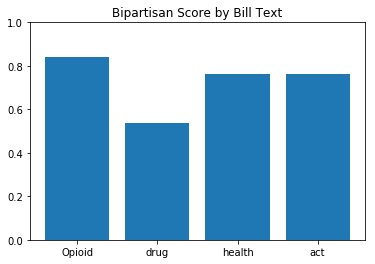

In [124]:
BipartisanScore = pd.DataFrame(list(zip(terms, score)))

plt.bar(BipartisanScore[0], BipartisanScore[1])
plt.ylim(0,1)
plt.title("Bipartisan Score by Bill Text")

In [138]:
opioid = vote_data[vote_data['Opioid']]
opioidgroup = opioid.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
opioidgroup['PercentYes - Opioid'] = opioidgroup['Yes'] / (opioidgroup['Yes'] + opioidgroup['No'])
opioidgroup = opioidgroup.drop('No', 1)
opioidgroup = opioidgroup.drop('Yes', 1)
opioidgroup.head()



,PercentYes - Opioid
member_id,
A000055,0.875
A000367,0.125
A000369,0.875
A000370,0.750
A000371,0.750


In [137]:
drug = vote_data[vote_data['drug']]
druggroup = drug.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
druggroup['PercentYes - Drug'] = druggroup['Yes'] / (druggroup['Yes'] + druggroup['No'])
druggroup = druggroup.drop('No', 1)
druggroup = druggroup.drop('Yes', 1)
druggroup.head()

,PercentYes - Drug
member_id,
A000055,1.0
A000367,1.0
A000369,1.0
A000370,0.0
A000371,0.0


In [146]:
vote_summary = pd.merge(opioidgroup, druggroup, on = "member_id", how = 'outer')
vote_summary.index.names = ['id']

vote_summary.head()

,PercentYes - Opioid,PercentYes - Drug
id,,
A000055,0.875,1.0
A000367,0.125,1.0
A000369,0.875,1.0
A000370,0.750,0.0
A000371,0.750,0.0


In [148]:
all_members_votes = pd.merge(reps_short_list, vote_summary, on = 'id', how = 'outer')
all_members_votes.head()

,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,missed_votes_pct,votes_with_party_pct,State_Disct,PercentYes - Opioid,PercentYes - Drug
0,A000374,Ralph,Abraham,R,5,LA,1147.0,8.0,4,0.70,96.93,LA-5,0.875,1.0
1,A000370,Alma,Adams,D,12,NC,1147.0,32.0,6,2.79,95.70,NC-12,0.750,0.0
2,A000055,Robert,Aderholt,R,4,AL,1147.0,48.0,22,4.18,96.82,AL-4,0.875,1.0
3,A000371,Pete,Aguilar,D,31,CA,1147.0,14.0,4,1.22,92.06,CA-31,0.750,0.0
4,A000372,Rick,Allen,R,12,GA,1147.0,12.0,4,1.05,97.80,GA-12,0.875,1.0


In [166]:
yes_votes = all_members_votes.groupby('state').agg({'PercentYes - Opioid' : 'mean'})

In [158]:
state = pd.read_csv("../uwi/data/statedata.csv")
state.head()

,Unnamed: 0,STATEFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION
0,0,0,2014,MH_fac,10424.0,United States,US
1,1,1,2014,MH_fac,135.0,Alabama,AL
2,2,2,2014,MH_fac,80.0,Alaska,AK
3,3,4,2014,MH_fac,327.0,Arizona,AZ
4,4,5,2014,MH_fac,209.0,Arkansas,AR


In [165]:
state_death_rate = state[state['INDICATOR']== 'drugdeathrate']
state_death_rate = state_death_rate[state_death_rate['YEAR'] == 2016]

state_death_rate['state'] = state_death_rate['STATEABBREVIATION']
state_death_rate.head()

,Unnamed: 0,STATEFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,state
8652,8652,1,2016,drugdeathrate,15.5,Alabama,AL,AL
8666,8666,2,2016,drugdeathrate,17.3,Alaska,AK,AK
8680,8680,4,2016,drugdeathrate,19.9,Arizona,AZ,AZ
8694,8694,5,2016,drugdeathrate,13.4,Arkansas,AR,AR
8708,8708,6,2016,drugdeathrate,11.9,California,CA,CA


In [169]:
deaths_to_yes = pd.merge(yes_votes, state_death_rate, on = 'state', how = 'inner')
deaths_to_yes = deaths_to_yes[['PercentYes - Opioid', 'VALUE', 'state']]

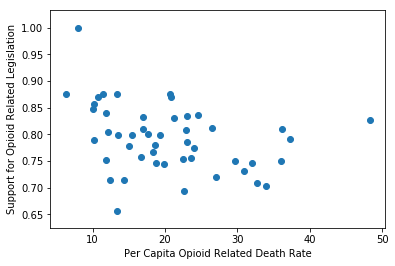

In [176]:
plt.scatter(deaths_to_yes['VALUE'], deaths_to_yes['PercentYes - Opioid'])
plt.xlabel('Per Capita Opioid Related Death Rate')
plt.ylabel('Support for Opioid Related Legislation')
plt.show()